In [63]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-fc-dp.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

season = 14
# df = df[df['season'] == season]
len(df)

8338

In [64]:
df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"), "pitcher_vibes"] = 0
df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"), "batter_vibes"] = 0

df = df[df['event_type'] != "FC"]
df = df[df[''] != "FC"]

for attr in [
    "batter_buoyancy",
    "batter_divinity",
    "batter_martyrdom",
    "batter_moxie",
    "batter_musclitude",
    "batter_patheticism",
    "batter_thwackability",
    "batter_tragicness",
    "batter_coldness",
    "batter_overpowerment",
    "batter_ruthlessness",
    "batter_shakespearianism",
    "batter_suppression",
    "batter_unthwackability",
    "batter_base_thirst",
    "batter_continuation",
    "batter_ground_friction",
    "batter_indulgence",
    "batter_laserlikeness",
    "batter_anticapitalism",
    "batter_chasiness",
    "batter_omniscience",
    "batter_tenaciousness",
    "batter_watchfulness",
    "batter_pressurization",
    "batter_cinnamon",
]:
    df[attr] = df[attr] * df["batter_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["batter_vibes"])
for attr in [
    "pitcher_buoyancy",
    "pitcher_divinity",
    "pitcher_martyrdom",
    "pitcher_moxie",
    "pitcher_musclitude",
    "pitcher_patheticism",
    "pitcher_thwackability",
    "pitcher_tragicness",
    "pitcher_ruthlessness",
    "pitcher_overpowerment",
    "pitcher_unthwackability",
    "pitcher_shakespearianism",
    "pitcher_suppression",
    "pitcher_coldness",
    "pitcher_base_thirst",
    "pitcher_continuation",
    "pitcher_ground_friction",
    "pitcher_indulgence",
    "pitcher_laserlikeness",
    "pitcher_anticapitalism",
    "pitcher_chasiness",
    "pitcher_omniscience",
    "pitcher_tenaciousness",
    "pitcher_watchfulness",
    "pitcher_pressurization",
    "pitcher_cinnamon",
]:
    df[attr] = df[attr] * df["pitcher_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["pitcher_vibes"])
df["batter_suppression_with_pitcher_vibe"] = df["batter_suppression"] * (
    1 + 0.2 * df["pitcher_vibes"]
)

for attr in [
    "fielder_anticapitalism",
    "fielder_chasiness",
    "fielder_omniscience",
    "fielder_tenaciousness",
    "fielder_watchfulness",
]:
    df[attr + "_times_vibe"] = df[attr] * df["fielder_vibes"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["fielder_vibes"])

/tmp/ipykernel_288119/1246641632.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["pitcher_vibes"])
/tmp/ipykernel_288119/1246641632.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["pitcher_vibes"])
/tmp/ipykernel_288119/1246641632.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

In [65]:
dfc = df.copy()
# for exclude_mod in ["OVERPERFORMING", "UNDERPERFORMING", "HIGH_PRESSURE", "GROWTH", "SINKING_SHIP", "TRAVELING"]:
for exclude_mod in ["FLINCH", "O_NO", "ON_FIRE", "GROWTH", "TRAVELING"]:
    dfc = dfc[~dfc["batter_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["pitcher_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["batting_team_mods"].astype(str).str.contains(exclude_mod)]

# dfc = dfc[dfc['roll'] < 0.7]
# dfc = dfc[dfc['roll'] > 0.2]
dfc = dfc[(dfc["pitcher_multiplier"] == 1) & (dfc["batter_multiplier"] == 1)]
# dfc = dfc[(dfc['pitcher_vibes'].abs() < 0.2) & (dfc['batter_vibes'].abs() < 0.2)]
# for limit_attr in ['batter_patheticism', 'batter_thwackability', 'batter_divinity', 'batter_musclitude', 'pitcher_ruthlessness']:
#     dfc = dfc[(dfc[limit_attr] > 0.1) & (dfc[limit_attr] < 0.9)]
# dfc = dfc[dfc['batter_thwackability'] + dfc['batter_musclitude'] + dfc['batter_divinity'] > dfc['batter_patheticism']]

len(dfc)

2811

In [66]:
# dfc.corr()['offset'].sort_values()

In [67]:
X = dfc[
    [
        "roll",
        "passed",
        "batter_buoyancy_with_vibe",
        "batter_divinity_with_vibe",
        "batter_martyrdom_with_vibe",
        "batter_moxie_with_vibe",
        "batter_musclitude_with_vibe",
        "batter_patheticism_with_vibe",
        "batter_thwackability_with_vibe",
        "batter_tragicness_with_vibe",
        "batter_coldness_with_vibe",
        "batter_overpowerment_with_vibe",
        "batter_ruthlessness_with_vibe",
        "batter_shakespearianism_with_vibe",
        "batter_suppression_with_vibe",
        "batter_unthwackability_with_vibe",
        "batter_base_thirst_with_vibe",
        "batter_continuation_with_vibe",
        "batter_ground_friction_with_vibe",
        "batter_indulgence_with_vibe",
        "batter_laserlikeness_with_vibe",
        "batter_anticapitalism_with_vibe",
        "batter_chasiness_with_vibe",
        "batter_omniscience_with_vibe",
        "batter_tenaciousness_with_vibe",
        "batter_watchfulness_with_vibe",
        "batter_pressurization_with_vibe",
        "batter_cinnamon_with_vibe",
        "pitcher_buoyancy_with_vibe",
        "pitcher_divinity_with_vibe",
        "pitcher_martyrdom_with_vibe",
        "pitcher_moxie_with_vibe",
        "pitcher_musclitude_with_vibe",
        "pitcher_patheticism_with_vibe",
        "pitcher_thwackability_with_vibe",
        "pitcher_tragicness_with_vibe",
        "pitcher_ruthlessness_with_vibe",
        "pitcher_overpowerment_with_vibe",
        "pitcher_unthwackability_with_vibe",
        "pitcher_shakespearianism_with_vibe",
        "pitcher_suppression_with_vibe",
        "pitcher_coldness_with_vibe",
        "pitcher_base_thirst_with_vibe",
        "pitcher_continuation_with_vibe",
        "pitcher_ground_friction_with_vibe",
        "pitcher_indulgence_with_vibe",
        "pitcher_laserlikeness_with_vibe",
        "pitcher_anticapitalism_with_vibe",
        "pitcher_chasiness_with_vibe",
        "pitcher_omniscience_with_vibe",
        "pitcher_tenaciousness_with_vibe",
        "pitcher_watchfulness_with_vibe",
        "pitcher_pressurization_with_vibe",
        "pitcher_cinnamon_with_vibe",
        "batter_suppression_with_pitcher_vibe",
        "fielder_anticapitalism_times_vibe",
        "fielder_anticapitalism_with_vibe",
        "fielder_chasiness_times_vibe",
        "fielder_chasiness_with_vibe",
        "fielder_omniscience_times_vibe",
        "fielder_omniscience_with_vibe",
        "fielder_tenaciousness_times_vibe",
        "fielder_tenaciousness_with_vibe",
        "fielder_watchfulness_times_vibe",
        "fielder_watchfulness_with_vibe",
        "ballpark_grandiosity",
        "ballpark_fortification",
        "ballpark_obtuseness",
        "ballpark_ominousness",
        "ballpark_inconvenience",
        "ballpark_viscosity",
        "ballpark_forwardness",
        "ballpark_mysticism",
        "ballpark_elongation",
        "ballpark_filthiness",
    ]
]
# X = X[X['roll'] < 0.85]

# X = dfc[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
# X = dfc[['roll', 'pitcher_ruthlessness']]
y = X["passed"]
X = X.drop("passed", axis=1)

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

# # trainedsvm = svm.SVC(kernel='linear').fit(X, y)
# trainedsvm = svm.LinearSVC(dual=False, max_iter=100000).fit(X, y)
# predictionsvm = trainedsvm.predict(X)
# print(confusion_matrix(y,predictionsvm))
# print(classification_report(y,predictionsvm))

sc = StandardScaler()
X2 = sc.fit_transform(X)

trainedsvm = svm.LinearSVC(
    intercept_scaling=100, dual=False, max_iter=100000, C=1000, class_weight="balanced"
).fit(X2, y)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y, predictionsvm))
print(classification_report(y, predictionsvm))
print(trainedsvm.score(X2, y))

[[1693  718]
 [  74  326]]
              precision    recall  f1-score   support

       False       0.96      0.70      0.81      2411
        True       0.31      0.81      0.45       400

    accuracy                           0.72      2811
   macro avg       0.64      0.76      0.63      2811
weighted avg       0.87      0.72      0.76      2811

0.7182497331910352


In [69]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
print(intercept_scaled)
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[-1.40592095]


[(3.807299408115194, 'fielder_anticapitalism_with_vibe'),
 (3.373798689625649, 'pitcher_shakespearianism_with_vibe'),
 (-1.8467792246416341, 'fielder_chasiness_with_vibe'),
 (-1.8023765912975265, 'ballpark_mysticism'),
 (1.6626185376763856, 'batter_tragicness_with_vibe'),
 (-1.316893433409979, 'ballpark_fortification'),
 (1.2219233293531893, 'fielder_watchfulness_with_vibe'),
 (-1.2107237279466216, 'ballpark_obtuseness'),
 (-1.1613760854663933, 'fielder_omniscience_with_vibe'),
 (1.0, 'roll'),
 (0.8400511911046403, 'ballpark_inconvenience'),
 (-0.8280747812608664, 'ballpark_ominousness'),
 (-0.8102641517629914, 'pitcher_moxie_with_vibe'),
 (-0.7429937473779393, 'pitcher_ruthlessness_with_vibe'),
 (-0.6355834658726326, 'fielder_tenaciousness_with_vibe'),
 (0.562663199661941, 'ballpark_grandiosity'),
 (-0.5318480824435398, 'pitcher_pressurization_with_vibe'),
 (0.5245179525487776, 'ballpark_forwardness'),
 (-0.522135372964507, 'ballpark_viscosity'),
 (0.5212059733562904, 'batter_suppress

[1.40592095]
(0.18967422011345383, 'batter_buoyancy_with_vibe')
(-0.15179018866783692, 'batter_divinity_with_vibe')
(0.4976288570010318, 'batter_martyrdom_with_vibe')
(0.07034115245532988, 'batter_moxie_with_vibe')
(-0.2188344492547722, 'batter_musclitude_with_vibe')
(0.07777601362326035, 'batter_patheticism_with_vibe')
(0.1340642756426181, 'batter_thwackability_with_vibe')
(-1.6626185376763856, 'batter_tragicness_with_vibe')
(-0.24293805059583215, 'batter_coldness_with_vibe')
(0.049002709465356974, 'batter_overpowerment_with_vibe')
(0.179909730490064, 'batter_ruthlessness_with_vibe')
(0.47799912983645226, 'batter_shakespearianism_with_vibe')
(-0.5212059733562904, 'batter_suppression_with_vibe')
(-0.05179664980816717, 'batter_unthwackability_with_vibe')
(-0.05261291745293207, 'batter_base_thirst_with_vibe')
(-0.21737480546429097, 'batter_continuation_with_vibe')
(-0.318253835417747, 'batter_ground_friction_with_vibe')
(0.2474003693920239, 'batter_indulgence_with_vibe')
(-0.283267265354

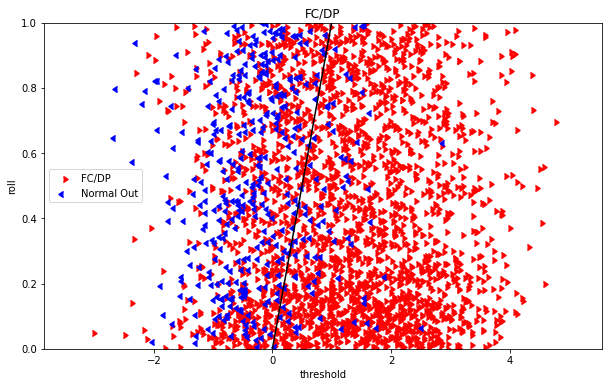

In [70]:
dfc["threshold_rounded"] = 0.18 - (
    -0.3 * dfc["batter_buoyancy"]
    + 0.16 * dfc["batter_suppression"]
    + 0.1 * (dfc["ballpark_ominousness"] - 0.5)
)

dfc["threshold"] = -intercept_scaled[0]
print(-intercept_scaled)
for pair in zip(-np.array(coef_list), X.columns):
    if pair[1] != "roll":
        print(pair)
        dfc["threshold"] += pair[0] * dfc[pair[1]]

# x_val = "day"
x_val = "threshold"
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.scatter(
    dfc[~dfc["passed"]][x_val],
    dfc[~dfc["passed"]]["roll"],
    color="red",
    label="FC/DP",
    marker=CARETRIGHTBASE,
)
ax.scatter(
    dfc[dfc["passed"]][x_val],
    dfc[dfc["passed"]]["roll"],
    color="blue",
    label="Normal Out",
    marker=CARETLEFTBASE,
)
ax.set_xlabel(x_val)
ax.set_ylabel("roll")
ax.set_title("FC/DP")
# ax.set_xlim(0.484, 0.499)
ax.set_ylim(0, 1)

ax.plot(ax.get_xlim(), ax.get_xlim(), "k")

ax.legend()

2019


,offset,roll,threshold,event_type,top_of_inning,inning,event_type,batter_vibes,pitcher_vibes,ballpark_viscosity,batter_musclitude,batter_name,pitcher_name,batter_mods,pitcher_mods,batting_team_mods,pitching_team_mods,day,game_id,play_count
8306,3.418183,0.795861,-2.622322,DP,False,3,DP,0.813779,0.140271,0.276975,0.881153,Bottles Suljak,Sandford Garner,NaN,NaN,MAINTENANCE_MODE;PARTY_TIME,LOVE,97,3f21fbcf-bc5c-4bb3-9831-82be44f50b23,126
1432,3.292787,0.646670,-2.646117,DP,True,8,DP,0.278267,0.540919,0.583422,0.415433,Mint Shupe,Nandy Slumps,NaN,NaN,UNDERSEA,NaN,10,b487cdbe-f33b-44ed-9bb9-bad265301d62,309
169,3.228718,0.937911,-2.290806,DP,False,6,DP,0.189946,0.686457,0.500000,1.156215,Sam Scandal,Goodwin Morin,NaN,NaN,NaN,NaN,81,23a1a305-b75d-41f7-9f8d-c5e281435da3,245
7657,2.912987,0.572303,-2.340684,DP,False,2,DP,-0.039098,0.470611,0.431210,0.373498,Gita Sparrow,Qais Dogwalker,NaN,FRIEND_OF_CROWS,NaN,LIFE_OF_PARTY;ELECTRIC,86,efabed30-ddc7-4396-a742-90ac60a8fa30,92
134,2.910421,0.749327,-2.161094,DP,False,1,DP,0.333240,0.686457,0.500000,0.614583,Kline Greenlemon,Goodwin Morin,NaN,NaN,NaN,NaN,81,23a1a305-b75d-41f7-9f8d-c5e281435da3,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5645,-4.010881,0.157229,4.168110,Out,True,7,Out,0.103301,-0.559131,0.575186,0.550439,Commissioner Vapor,Lenny Marijuana,PERK,NaN,HIGH_PRESSURE,PARTY_TIME,93,63232349-13c0-4bfb-b15b-d07104f2251c,332
4878,-4.049024,0.693845,4.742870,Out,True,5,Out,-0.004055,0.279265,0.432771,0.783859,Rat Mason,Alexandria Rosales,NaN,TRIPLE_THREAT,SUN_KISSED;SUN2_PAYOUTS,NaN,80,c45c77a8-cfd6-46d8-8e82-3e19096946e0,197
5610,-4.052961,0.145851,4.198812,Out,True,1,Out,0.175209,-0.559131,0.575186,1.151078,Alston Cerveza,Lenny Marijuana,NaN,NaN,HIGH_PRESSURE,PARTY_TIME,93,63232349-13c0-4bfb-b15b-d07104f2251c,75
5878,-4.135015,0.385502,4.520517,Out,True,3,Out,0.672165,-0.533282,0.575186,1.128806,Mcdowell Mason,Chorby Soul,NaN,RETURNED;DEBT_THREE,SUN_KISSED;SUN2_PAYOUTS,PARTY_TIME,98,3966f0f9-ecbe-44f1-a444-e0beac6e4af1,106


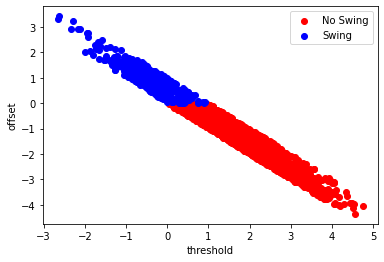

In [71]:
dfc["offset"] = dfc["roll"] - dfc["threshold"]
outliers = dfc[
    (dfc["passed"] & (dfc["offset"] >= 0)) | (~dfc["passed"] & (dfc["offset"] <= 0))
]

fig, ax = plt.subplots(1)
x_val = "threshold"
ax.scatter(
    outliers[~outliers["passed"]][x_val],
    outliers[~outliers["passed"]]["offset"],
    color="red",
    label="No Swing",
)
ax.scatter(
    outliers[outliers["passed"]][x_val],
    outliers[outliers["passed"]]["offset"],
    color="blue",
    label="Swing",
)
ax.set_xlabel(x_val)
ax.set_ylabel("offset")
ax.legend()

table = outliers
print(len(table))
table[
    [
        "offset",
        "roll",
        "threshold",
        "event_type",
        "top_of_inning",
        "inning",
        "event_type",
        "batter_vibes",
        "pitcher_vibes",
        "ballpark_viscosity",
        "batter_musclitude",
        "batter_name",
        "pitcher_name",
        "batter_mods",
        "pitcher_mods",
        "batting_team_mods",
        "pitching_team_mods",
        "day",
        "game_id",
        "play_count",
    ]
].sort_values("offset", ascending=False)
# len(table)

In [72]:
list(df.columns)

['Unnamed: 0',
 'event_type',
 'roll',
 'passed',
 'batter_buoyancy',
 'batter_divinity',
 'batter_martyrdom',
 'batter_moxie',
 'batter_musclitude',
 'batter_patheticism',
 'batter_thwackability',
 'batter_tragicness',
 'batter_coldness',
 'batter_overpowerment',
 'batter_ruthlessness',
 'batter_shakespearianism',
 'batter_suppression',
 'batter_unthwackability',
 'batter_base_thirst',
 'batter_continuation',
 'batter_ground_friction',
 'batter_indulgence',
 'batter_laserlikeness',
 'batter_anticapitalism',
 'batter_chasiness',
 'batter_omniscience',
 'batter_tenaciousness',
 'batter_watchfulness',
 'batter_pressurization',
 'batter_cinnamon',
 'batter_multiplier',
 'pitcher_buoyancy',
 'pitcher_divinity',
 'pitcher_martyrdom',
 'pitcher_moxie',
 'pitcher_musclitude',
 'pitcher_patheticism',
 'pitcher_thwackability',
 'pitcher_tragicness',
 'pitcher_ruthlessness',
 'pitcher_overpowerment',
 'pitcher_unthwackability',
 'pitcher_shakespearianism',
 'pitcher_suppression',
 'pitcher_coldn